<a href="https://colab.research.google.com/github/FernandoCallasaca/data_science_projects/blob/main/Automobile_Dataset_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparamos nuestro entorno de trabajo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Data Science/Proyectos/Automobile Dataset/'
!ls

/content/drive/My Drive/Data Science/Proyectos/Automobile Dataset
 auto.csv			     automobile-with-names.csv
'Automobile Dataset.ipynb'	     auto-procesado.csv
'Automobile Dataset Parte 2.ipynb'


In [3]:
def path_file(name_file):
  return '/content/drive/My Drive/Data Science/Proyectos/Automobile Dataset/{0}'.format(name_file)

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.__version__

'1.1.5'

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

# Leemos nuestra data

In [6]:
path_read_file = path_file('auto-procesado.csv')
path_read_file

'/content/drive/My Drive/Data Science/Proyectos/Automobile Dataset/auto-procesado.csv'

In [7]:
df = pd.read_csv(path_read_file)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.60,0.81,0.89,0.82,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,"5,000.00",11.19,8.70,"13,495.00",Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.60,0.81,0.89,0.82,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,"5,000.00",11.19,8.70,"16,500.00",Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.50,0.82,0.91,0.88,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,"5,000.00",12.37,9.04,"16,500.00",Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.80,0.85,0.92,0.91,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,"5,500.00",9.79,7.83,"13,950.00",Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.40,0.85,0.92,0.91,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,"5,500.00",13.06,10.68,"17,450.00",Low,0,1


In [8]:
df.shape

(201, 28)

In [9]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,diesel,gas
count,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00,201.00
mean,0.84,122.00,98.80,0.84,0.92,0.90,"2,555.67",126.88,3.33,3.26,10.16,103.40,"5,117.67",9.94,8.04,"13,207.13",0.10,0.90
std,1.25,32.00,6.07,0.06,0.03,0.04,517.30,41.55,0.27,0.32,4.00,37.37,478.11,2.53,1.84,"7,947.07",0.30,0.30
min,-2.00,65.00,86.60,0.68,0.84,0.80,"1,488.00",61.00,2.54,2.07,7.00,48.00,"4,150.00",4.80,4.35,"5,118.00",0.00,0.00
25%,0.00,101.00,94.50,0.80,0.89,0.87,"2,169.00",98.00,3.15,3.11,8.60,70.00,"4,800.00",7.83,6.91,"7,775.00",0.00,1.00
50%,1.00,122.00,97.00,0.83,0.91,0.90,"2,414.00",120.00,3.31,3.29,9.00,95.00,"5,125.37",9.79,7.83,"10,295.00",0.00,1.00
75%,2.00,137.00,102.40,0.88,0.93,0.93,"2,926.00",141.00,3.58,3.41,9.40,116.00,"5,500.00",12.37,9.40,"16,500.00",0.00,1.00
max,3.00,256.00,120.90,1.00,1.00,1.00,"4,066.00",326.00,3.94,4.17,23.00,262.00,"6,600.00",18.08,14.69,"45,400.00",1.00,1.00


In [10]:
df.describe(include = ['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,153


In [11]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,diesel,gas
symboling,1.00,0.47,-0.54,-0.37,-0.24,-0.55,-0.23,-0.11,-0.14,-0.01,-0.18,0.08,0.28,0.07,-0.03,-0.08,-0.20,0.20
normalized-losses,0.47,1.00,-0.06,0.02,0.09,-0.37,0.10,0.11,-0.03,0.06,-0.11,0.22,0.24,0.24,0.18,0.13,-0.10,0.10
wheel-base,-0.54,-0.06,1.00,0.88,0.81,0.59,0.78,0.57,0.49,0.16,0.25,0.37,-0.36,0.48,0.58,0.58,0.31,-0.31
length,-0.37,0.02,0.88,1.00,0.86,0.49,0.88,0.69,0.61,0.12,0.16,0.58,-0.29,0.66,0.71,0.69,0.21,-0.21
width,-0.24,0.09,0.81,0.86,1.00,0.31,0.87,0.73,0.54,0.19,0.19,0.62,-0.25,0.67,0.74,0.75,0.24,-0.24
height,-0.55,-0.37,0.59,0.49,0.31,1.00,0.31,0.07,0.18,-0.06,0.26,-0.09,-0.31,0.00,0.08,0.14,0.28,-0.28
curb-weight,-0.23,0.10,0.78,0.88,0.87,0.31,1.00,0.85,0.64,0.17,0.16,0.76,-0.28,0.79,0.84,0.83,0.22,-0.22
engine-size,-0.11,0.11,0.57,0.69,0.73,0.07,0.85,1.00,0.57,0.21,0.03,0.82,-0.26,0.75,0.78,0.87,0.07,-0.07
bore,-0.14,-0.03,0.49,0.61,0.54,0.18,0.64,0.57,1.00,-0.06,0.00,0.57,-0.27,0.55,0.56,0.54,0.05,-0.05
stroke,-0.01,0.06,0.16,0.12,0.19,-0.06,0.17,0.21,-0.06,1.00,0.19,0.10,-0.06,0.04,0.05,0.08,0.24,-0.24


# Empezamos a verificar qué variables nos serviría para la predicción

## Variables Continuas

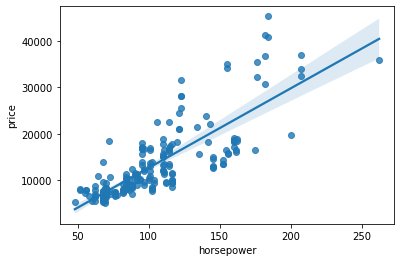

In [12]:
# siempre la que queremos evaluar va en el eje x
## 'horsepower'
sns.regplot(x = 'horsepower', y = 'price', data = df)
# nos damos cuenta que esta variable es una potencial variable de predicción

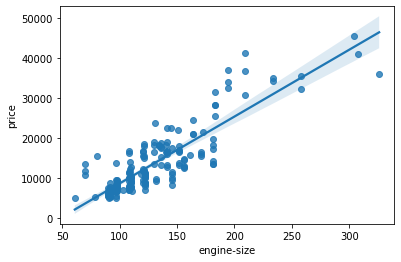

In [13]:
# 'engine-size'
sns.regplot(x = 'engine-size', y = 'price', data = df)
# igualmente es una variable potencial de predicción

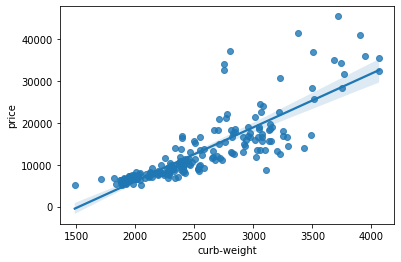

In [14]:
# 'curb-weight'
sns.regplot(x = 'curb-weight', y = 'price', data = df)

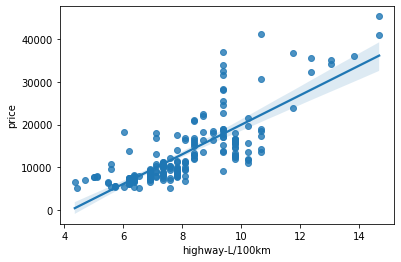

In [15]:
# 'highway-L/100km'
sns.regplot(x = 'highway-L/100km', y = 'price', data = df)
# este también es una variable potencial de predicción

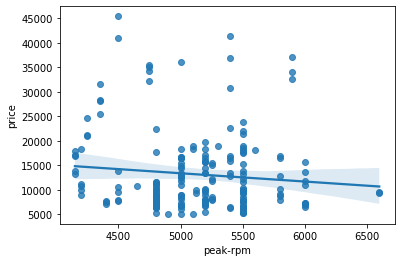

In [16]:
# 'peak-rpm'
sns.regplot(x= 'peak-rpm', y = 'price', data = df)
# esta variable no es una variable potencial para nuestr predicción

In [17]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.00,-0.10
price,-0.10,1.00


## Variables categóricas

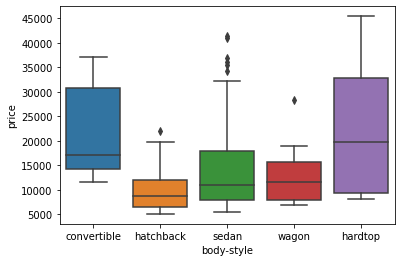

In [18]:
# 'body-style'
sns.boxplot(x = 'body-style', y = 'price', data = df)
# como las variables tienen una superposición entonces no es un buen predictor del precio

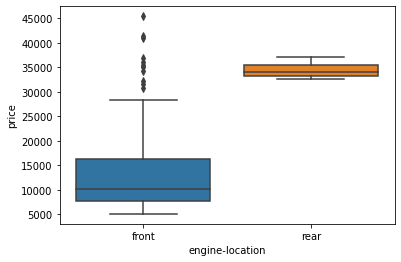

In [19]:
# 'engine-location'
sns.boxplot(x = 'engine-location', y = 'price', data = df)
# esta variable si es un buen indicador de predicción

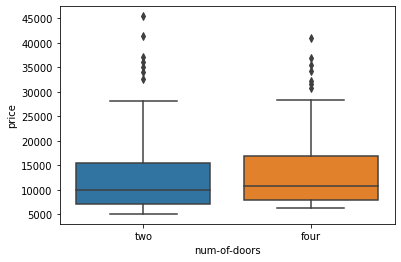

In [20]:
# 'num-of-doors'
sns.boxplot(x = 'num-of-doors', y = 'price', data = df)
# esta variable no nos sirve para predecir

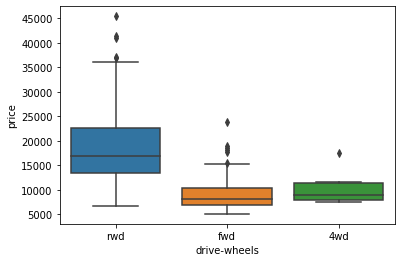

In [21]:
# 'drive-wheels'
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)
# aquí la distribución del precio es diferente entonces podrían potencialmente
# predecir el precio

In [23]:
# agrupamos por 'body-style' la media de precio de cada 'body-style'
df_group_1 = df[['body-style', 'price']]
df_group_1.groupby('body-style', as_index = False).mean()

,body-style,price
0,convertible,"21,890.50"
1,hardtop,"22,208.50"
2,hatchback,"9,957.44"
3,sedan,"14,459.76"
4,wagon,"12,371.96"


In [24]:
# agrupamos por 'drive-wheels' y 'body-style' y sacamos la media por precio
df_grupo_2 = df[['drive-wheels', 'body-style', 'price']]
df_grupo_2.groupby(['drive-wheels', 'body-style'], as_index = False).mean()

,drive-wheels,body-style,price
0,4wd,hatchback,"7,603.00"
1,4wd,sedan,"12,647.33"
2,4wd,wagon,"9,095.75"
3,fwd,convertible,"11,595.00"
4,fwd,hardtop,"8,249.00"
5,fwd,hatchback,"8,396.39"
6,fwd,sedan,"9,811.80"
7,fwd,wagon,"9,997.33"
8,rwd,convertible,"23,949.60"
9,rwd,hardtop,"24,202.71"


In [25]:
# La mejor manera es hacerlo con pivot
# para eso tenemos que tener un grupo ya estructurado
df_group = df_grupo_2.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
grouped_pivot = df_group.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                  nan       nan  7,603.00 12,647.33  9,095.75
fwd            11,595.00  8,249.00  8,396.39  9,811.80  9,997.33
rwd            23,949.60 24,202.71 14,337.78 21,711.83 16,994.22

In [26]:
grouped_pivot.replace(np.nan, 0, inplace = True)
grouped_pivot

price                                        
body-style   convertible   hardtop hatchback     sedan     wagon
drive-wheels                                                    
4wd                 0.00      0.00  7,603.00 12,647.33  9,095.75
fwd            11,595.00  8,249.00  8,396.39  9,811.80  9,997.33
rwd            23,949.60 24,202.71 14,337.78 21,711.83 16,994.22

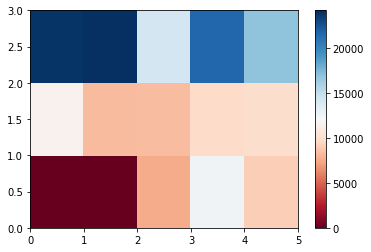

In [27]:
# ahora usaremos el gruped_pivot
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

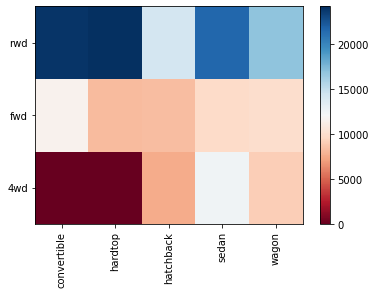

In [28]:
# para un mejor entendimiento de la imagen anterior 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# aquí colocamos los nombres
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# movemos los nombres al centro nombre = label
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insertamos los nombres
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# girar los nombres si es demasiado larga
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Correlación y causalida (Correlation and Causation)

In [29]:
# formula para saber la correlación de pearson
# 1 correlación lineal positiva perfecta
# 0 sin correlación lineal
# -1 correlación lineal negativa perfecta

# calculamos pearson correlation de variables enteras y flotantes
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,diesel,gas
symboling,1.00,0.47,-0.54,-0.37,-0.24,-0.55,-0.23,-0.11,-0.14,-0.01,-0.18,0.08,0.28,0.07,-0.03,-0.08,-0.20,0.20
normalized-losses,0.47,1.00,-0.06,0.02,0.09,-0.37,0.10,0.11,-0.03,0.06,-0.11,0.22,0.24,0.24,0.18,0.13,-0.10,0.10
wheel-base,-0.54,-0.06,1.00,0.88,0.81,0.59,0.78,0.57,0.49,0.16,0.25,0.37,-0.36,0.48,0.58,0.58,0.31,-0.31
length,-0.37,0.02,0.88,1.00,0.86,0.49,0.88,0.69,0.61,0.12,0.16,0.58,-0.29,0.66,0.71,0.69,0.21,-0.21
width,-0.24,0.09,0.81,0.86,1.00,0.31,0.87,0.73,0.54,0.19,0.19,0.62,-0.25,0.67,0.74,0.75,0.24,-0.24
height,-0.55,-0.37,0.59,0.49,0.31,1.00,0.31,0.07,0.18,-0.06,0.26,-0.09,-0.31,0.00,0.08,0.14,0.28,-0.28
curb-weight,-0.23,0.10,0.78,0.88,0.87,0.31,1.00,0.85,0.64,0.17,0.16,0.76,-0.28,0.79,0.84,0.83,0.22,-0.22
engine-size,-0.11,0.11,0.57,0.69,0.73,0.07,0.85,1.00,0.57,0.21,0.03,0.82,-0.26,0.75,0.78,0.87,0.07,-0.07
bore,-0.14,-0.03,0.49,0.61,0.54,0.18,0.64,0.57,1.00,-0.06,0.00,0.57,-0.27,0.55,0.56,0.54,0.05,-0.05
stroke,-0.01,0.06,0.16,0.12,0.19,-0.06,0.17,0.21,-0.06,1.00,0.19,0.10,-0.06,0.04,0.05,0.08,0.24,-0.24


Para saber el significado de la correlación estimada debemos tener en consideración lo siguiente:

**Valor P**

¿Qué es el valor P? El valor P es el valor de la probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significación de 0,05, lo que significa que tenemos un 95% de confianza en que la correlación entre las variables es significativa.

Por convención, cuando el

valor p es < 0,001: decimos que hay una fuerte evidencia de que la **correlación es significativa**.
el valor p es < 0,05: hay una **evidencia moderada** de que la correlación es significativa.
el valor p es < 0,1: hay **pruebas débiles** de que la correlación es significativa.
el valor p es > 0,1: **no hay pruebas** de que la correlación sea significativa.

In [30]:
# para obtener esa información importamos stats
from scipy import stats

In [31]:
# 'wheel-base' - 'price'
# sacamos el coeficiente y el valor de p
coef_pearson, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print('Coeficiente de pearson: {0} - Valor de P: {1}'.format(coef_pearson, p_value))

Coeficiente de pearson: 0.584641822265508 - Valor de P: 8.076488270733218e-20


Dado que el valor p es < 0,001, la correlación entre la distancia entre ejes y el precio es **estadísticamente significativa**, aunque la relación lineal no es extremadamente fuerte (~ 0,585).

In [32]:
# 'horsepower' - 'price'
coef_pearson, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('Coeficiente de pearson: {0} - Valor de P: {1}'.format(coef_pearson, p_value))

Coeficiente de pearson: 0.8096068016571054 - Valor de P: 6.273536270650504e-48


Dado que el valor p es < 0.001, la correlación entre caballos de fuerza y ​​precio es **estadísticamente significativa**, y la relación lineal es bastante fuerte (~ 0.809, cercana a 1).

In [33]:
# 'length' - 'price'
coef_pearson, p_value = stats.pearsonr(df['length'], df['price'])
print('Coeficiente de pearson: {0} - Valor de P: {1}'.format(coef_pearson, p_value))

Coeficiente de pearson: 0.6906283804483638 - Valor de P: 8.016477466159556e-30


In [34]:
# 'width' - 'price'
coef_pearson, p_value = stats.pearsonr(df['width'], df['price'])
print('Coeficiente de pearson: {0} - Valor de P: {1}'.format(coef_pearson, p_value))

Coeficiente de pearson: 0.7512653440522674 - Valor de P: 9.200335510481516e-38


In [35]:
# 'curb-weight' - 'price'
coef_pearson, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print('Coeficiente de pearson: {0} - Valor de P: {1}'.format(coef_pearson, p_value))

Coeficiente de pearson: 0.8344145257702843 - Valor de P: 2.189577238894065e-53


In [36]:
# 'engine-size' - 'price'
coef_pearson, p_value = stats.pearsonr(df['engine-size'], df['price'])
print('Coeficiente de pearson: {0} - Valor de P: {1}'.format(coef_pearson, p_value))

Coeficiente de pearson: 0.8723351674455185 - Valor de P: 9.265491622198389e-64


In [37]:
# 'bore' - 'price'
coef_pearson, p_value = stats.pearsonr(df['bore'], df['price'])
print('Coeficiente de pearson: {0} - Valor de P: {1}'.format(coef_pearson, p_value))

Coeficiente de pearson: 0.5431553832626602 - Valor de P: 8.049189483935489e-17


In [38]:
# 'city-L/100km' - 'price'
coef_pearson, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print('Coeficiente de pearson: {0} - Valor de P: {1}'.format(coef_pearson, p_value))

Coeficiente de pearson: 0.7898975136626943 - Valor de P: 3.903106400939802e-44


In [39]:
# 'highway-L/100km' - 'price'
coef_pearson, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print('Coeficiente de pearson: {0} - Valor de P: {1}'.format(coef_pearson, p_value))

Coeficiente de pearson: 0.8011176263981974 - Valor de P: 3.046784581041456e-46


# ANOVA = Análisis de la Varianza

El análisis de la varianza (ANOVA) es un método estadístico utilizado para comprobar si existen diferencias significativas entre las medias de dos o más grupos. El ANOVA devuelve dos parámetros:

Puntuación de la prueba F: El ANOVA supone que las medias de todos los grupos son iguales, calcula la desviación de las medias reales con respecto a la suposición, y la comunica como puntuación de la prueba F. Una puntuación mayor significa que hay una mayor diferencia entre las medias.

Valor P: El valor P indica lo estadísticamente significativo que es nuestro valor de puntuación calculado.

Si nuestra variable de precio está fuertemente correlacionada con la variable que estamos analizando, esperamos que el ANOVA devuelva una puntuación de prueba F considerable y un valor p pequeño.

Drive Wheels

Dado que el ANOVA analiza la diferencia entre diferentes grupos de la misma variable, la función groupby será muy útil. Como el algoritmo ANOVA promedia los datos automáticamente, no necesitamos sacar la media antes.

Para ver si los diferentes tipos de "Drive Wheels" afectan al "precio", agrupamos los datos.

In [44]:
grouped_test2=df[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,"13,495.00"
1,rwd,"16,500.00"
3,fwd,"13,950.00"
4,4wd,"17,450.00"
5,fwd,"15,250.00"
136,4wd,"7,603.00"


In [42]:
grouped_test2.get_group('4wd')['price']

4     17,450.00
136    7,603.00
140    9,233.00
141   11,259.00
144    8,013.00
145   11,694.00
150    7,898.00
151    8,778.00
Name: price, dtype: float64

Podemos utilizar la función 'f_oneway' del módulo 'stats' para obtener la puntuación de la prueba F y el valor P.

In [45]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Este es un gran resultado con una gran puntuación de la prueba F que muestra una fuerte correlación y un valor P de casi 0 que implica una significación estadística casi segura. Pero, ¿significa esto que los tres grupos analizados están así de correlacionados?

Examinémoslos por separado.

**fwd and rwd**

In [46]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


**4wd and rwd**

In [47]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


**4wd and fwd**

In [48]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


**Conclusión**: Variables importantes
Ahora tenemos una mejor idea de cómo son nuestros datos y qué variables son importantes para tener en cuenta a la hora de predecir el precio del coche. Lo hemos reducido a las siguientes variables:

Variables numéricas continuas:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

Variables categóricas:
- Drive-wheels

A medida que avanzamos en la construcción de modelos de aprendizaje automático para automatizar nuestro análisis, alimentar el modelo con variables que afectan significativamente a nuestra variable objetivo mejorará el rendimiento de predicción de nuestro modelo.